# Project 2 : Online Popularity

## Dataset Overview

**Source :** http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity <br/>
**Dataset storage URL :** https://drive.google.com/file/d/1v9B3RZzDSbySmLLpqE1Ts65naeqkMuGC/view?usp=sharing <br>
The dataset is the almost preprocessed dataset that extracted various features from the list of articles. 

**_The popularity of an article is measured in number of shares_**

The dataset is acquired on date : January 8, 2015 

##### Features introduction

Information of the attributes used in the following analysis: <br> 

0. **url**: URL of the article (non-predictive) 
1. **timedelta**: Days between the article publication and the dataset acquisition (non-predictive) 
2. **n_tokens_title**: Number of words in the title 
3. **n_tokens_content**: Number of words in the content  
4. **data_channel_is_lifestyle**: Is data channel 'Lifestyle'? 
5. **data_channel_is_entertainment**: Is data channel 'Entertainment'? 
6. **data_channel_is_bus**: Is data channel 'Business'? 
7. **data_channel_is_socmed**: Is data channel 'Social Media'? 
8. **data_channel_is_tech**: Is data channel 'Tech'? 
9. **data_channel_is_world**: Is data channel 'World'?
10. **weekday_is_monday**: Was the article published on a Monday? 
11. **weekday_is_tuesday**: Was the article published on a Tuesday? 
12. **weekday_is_wednesday**: Was the article published on a Wednesday? 
13. **weekday_is_thursday**: Was the article published on a Thursday? 
14. **weekday_is_friday**: Was the article published on a Friday? 
15. **weekday_is_saturday**: Was the article published on a Saturday? 
16. **weekday_is_sunday**: Was the article published on a Sunday? 
17. **avg_positive_polarity**: Avg. polarity of positive words 
18. **avg_negative_polarity**: Avg. polarity of negative words 
19. **shares**: Number of shares.

## Steps Followed

> - Step 0: Import required libraries
> - Step 1: Read Data
>> - Step 1.1: Apply constraints and get required data
> - Step 2: Data Preprocessing
>> - Step 2.1: Ignore unnecessary features
>> - Step 2.2: Rename columns
>> - Step 2.3: Reverese one-hot encoded columns
>> - Step 2.4: Rename shorthand represented values
> - Step 3: Data Cleaning
>> - Step 3.1: Check for null values
>> - Step 3.2: Check for duplicates
>> - Step 3.3: Check for outliers
>>> - Step3.3.1: Remove outliers using Inter Quartile Range (IQR)
> - Step 4: Data Visualization
>> - Question 1 : Is there a relation between polarity (positive/negative) of content and the week of the day concerning popularity?
>> - Question 2: Do the title features determine the popularity of the article more than the content?
>> - Question 3: Which week of the day is best based on the topic of the article?
> - Step 5: Conclusion

### Step 0: Import required libraries

In [1]:
import pandas as pd # to create, read and manuplace dataframe
import numpy as np # to handle arrays
import seaborn as sns # to plot graphs
import matplotlib.pyplot as plt # to plot graphs

In [2]:
pd.set_option('display.max_columns',None)

### Step 1: Read Data

In [3]:
url = "https://drive.google.com/file/d/1v9B3RZzDSbySmLLpqE1Ts65naeqkMuGC/view?usp=sharing" # URL of the data source
file_id = url.split('/')[-2] # get the document id
dwn_url = 'https://drive.google.com/uc?id=' + file_id # create the download URL
df_fullData = pd.read_csv(dwn_url) # load the dataset into dataframe


#### Step 1.1: Apply constraints and get required data

In [4]:
# get only recent 100days records from the time data is collections

df = df_fullData[df_fullData[" timedelta"]<=100].reset_index().drop(columns=["index"]) 

In [5]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2014/09/29/john-oliver-dro...,100.0,13.0,318.0,0.574675,1.0,0.738462,4.0,1.0,1.0,2.0,4.575472,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,875.0,169.370000,0.0,843300.0,470162.500000,0.000000,6001.076257,4177.655192,11300.0,11300.0,11300.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245417,0.025018,0.149846,0.554630,0.025089,0.458124,0.161829,0.047170,0.009434,0.833333,0.166667,0.362626,0.100000,0.80,-0.291667,-0.5,-0.125000,0.454545,0.136364,0.045455,0.136364,2900
1,http://mashable.com/2014/09/29/kevin-systrom-w...,100.0,8.0,3157.0,0.368421,1.0,0.560976,69.0,3.0,14.0,0.0,4.735508,8.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,976.0,194.918000,0.0,843300.0,299800.000000,0.000000,5299.760856,2514.880735,2500.0,2700.0,2600.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.793514,0.131409,0.025003,0.025025,0.025050,0.515481,0.205521,0.052582,0.014571,0.783019,0.216981,0.427647,0.033333,1.00,-0.262077,-0.7,-0.050000,0.000000,0.000000,0.500000,0.000000,5200
2,http://mashable.com/2014/09/29/krusty-the-clow...,100.0,8.0,92.0,0.802198,1.0,0.932203,3.0,0.0,1.0,0.0,4.706522,6.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,715.0,142.718000,0.0,843300.0,400916.666667,0.000000,5299.760856,3272.996535,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866565,0.033335,0.033354,0.033333,0.033413,0.431325,0.178379,0.076087,0.010870,0.875000,0.125000,0.365059,0.033333,1.00,-0.200000,-0.2,-0.200000,0.300000,1.000000,0.200000,1.000000,910
3,http://mashable.com/2014/09/29/lazy-cat-vacuum/,100.0,10.0,633.0,0.491883,1.0,0.647668,4.0,4.0,1.0,0.0,4.897314,6.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,775.0,172.166667,2400.0,843300.0,278883.333333,1388.000000,3474.415178,2492.157623,1200.0,1400.0,1300.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.388555,0.033335,0.221772,0.033334,0.323004,0.387961,-0.022369,0.022117,0.026856,0.451613,0.548387,0.350812,0.100000,0.70,-0.339216,-0.9,-0.100000,0.500000,-0.500000,0.000000,0.500000,912
4,http://mashable.com/2014/09/29/lenin-statue-uk...,100.0,13.0,371.0,0.590659,1.0,0.727273,10.0,7.0,1.0,0.0,4.638814,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1400.0,351.125000,17500.0,843300.0,295437.500000,2621.263158,5028.571429,3421.945018,1300.0,10000.0,3980.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025026,0.025019,0.025005,0.025000,0.899951,0.326054,0.075692,0.018868,0.010782,0.636364,0.363636,0.328664,0.136364,0.70,-0.240625,-0.4,-0.125000,1.000000,0.000000,0.500000,0.000000,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125000,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.0

In [6]:
df.shape

(5992, 61)

In [7]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.00000,5992.0,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000
mean,56.720461,11.159045,548.277036,0.478597,0.902203,0.616877,10.044559,2.659546,3.576435,1.144192,4.244204,6.963451,0.037717,0.188251,0.119326,0.026035,0.131842,0.32994,-1.0,934.683410,209.568557,18352.867156,843138.234312,323196.791055,1288.591653,5584.661653,3231.374064,3130.321459,7114.315254,4511.614960,0.172563,0.197096,0.185915,0.178571,0.139352,0.060915,0.065587,0.126502,0.144544,0.140654,0.278611,0.241642,0.194549,0.406060,0.096125,0.033602,0.015575,0.613364,0.288672,0.322783,0.086681,0.694059,-0.251247,-0.525769,-0.097577,0.290603,0.059624,0.340065,0.158766,2938.831275
std,25.872415,2.168785,454.655973,0.179926,0.297065,0.220737,12.027726,3.590485,6.330504,3.634242,1.423945,1.863610,0.190527,0.390945,0.324199,0.159252,0.338348,0.47023,0.0,2409.405719,377.284471,60452.609522,8534.840186,116408.821715,1145.784636,4926.221253,1277.857341,11995.541939,27751.736068,14213.079068,0.377901,0.397839,0.389070,0.383025,0.346343,0.239193,0.247580,0.332442,0.233144,0.223343,0.314048,0.307932,0.260013,0.156921,0.094649,0.018202,0.010476,0.245026,0.168001,0.133510,0.069372,0.304430,0.139894,0.317402,0.095271,0.326832,0.270624,0.187110,0.227117,8355.549222
min,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.0,0.000000,-1.000000,0.000000,233400.000000,60510.000000,-1.000000,3384.316871,1009.340669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018183,0.018227,0.018183,0.018204,0.018187,0.000000,-0.369336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,5.000000
25%,35.000000,10.000000,254.750000,0.445946,1.000000,0.608464,3.000000,1.000000,1.000000,0.000000,4.433472,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.0,412.000000,86.468750,0.000000,843300.000000,237142.500000,0.000000,3451.918966,2418.155378,660.000000,890.000000,853.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025169,0.025468,0.028574,0.028574,0.028573,0.370716,0.020514,0.022388,0.008696,0.541667,0.184211,0.283591,0.050000,0.50000

### Step 2: Data Preprocessing

#### Step 2.1: Ignore unnecessary features

In [8]:
df_PrePross = df[['url',
                  ' timedelta',
                  ' n_tokens_title',
                  ' n_tokens_content',
                  ' weekday_is_monday',
                  ' weekday_is_tuesday',
                  ' weekday_is_wednesday',
                  ' weekday_is_thursday',
                  ' weekday_is_friday',
                  ' weekday_is_saturday',
                  ' weekday_is_sunday',
                  ' data_channel_is_lifestyle',
                  ' data_channel_is_entertainment',
                  ' data_channel_is_bus',
                  ' data_channel_is_socmed', 
                  ' data_channel_is_tech',
                  ' data_channel_is_world',
                  ' avg_positive_polarity',
                  ' avg_negative_polarity',
                  ' shares'
                 ]]  # select features required

#### Step 2.2: Rename columns

In [9]:
df_PrePross = df_PrePross.rename(columns={"url": "URL",
                                          " timedelta": "timedelta",
                                          ' n_tokens_title' : "title_tokens_count",
                                          ' n_tokens_content' : "content_tokens_count",
                                          ' weekday_is_monday':'weekday_is_monday',
                                          ' weekday_is_tuesday':'weekday_is_tuesday',
                                          ' weekday_is_wednesday':"weekday_is_wednesday",
                                          ' weekday_is_thursday':"weekday_is_thursday",
                                          ' weekday_is_friday':"weekday_is_friday",
                                          ' weekday_is_saturday':"weekday_is_saturday",
                                          ' weekday_is_sunday':"weekday_is_sunday",
                                          ' data_channel_is_lifestyle':'data_channel_is_lifestyle',
                                          ' data_channel_is_entertainment':"data_channel_is_entertainment",
                                          ' data_channel_is_bus':"data_channel_is_bus",
                                          ' data_channel_is_socmed':"data_channel_is_socmed", 
                                          ' data_channel_is_tech':"data_channel_is_tech",
                                          ' data_channel_is_world':"data_channel_is_world",
                                          ' avg_positive_polarity':"avg_positive_polarity",
                                          ' avg_negative_polarity':"avg_negative_polarity",
                                          ' shares':"shares"
                                         }) # rename and strip off the space from title 

#### Step 2.3: Reverese one-hot encoded columns

In [10]:
"""
one-hot encoding is used to convert categorical values into new feature for each category. 
for eg: 'monday' -> [1,0,0,0,0,0,0]; 'friday' -> [0,0,0,0,1,0,0] 
this is because we have 7 category values and each value turns to 

in fhe following we are reversing this values using idxmax
"""

df_PrePross['week'] = df_PrePross[['weekday_is_monday',
               'weekday_is_tuesday',
               'weekday_is_wednesday',
               'weekday_is_thursday',
               'weekday_is_friday',
               'weekday_is_saturday',
               'weekday_is_sunday']].idxmax(1).str.replace("weekday_is_", "") 

In [11]:
df_PrePross['week'] = pd.Categorical(df_PrePross['week'], [ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
# define the order of the categorical values so that it can be used to sort values in future

In [12]:
df_PrePross = df_PrePross.drop(columns=['weekday_is_monday',
               'weekday_is_tuesday',
               'weekday_is_wednesday',
               'weekday_is_thursday',
               'weekday_is_friday',
               'weekday_is_saturday',
               'weekday_is_sunday'])
# Remove these columns as the information is stored in single column

In [13]:
df_PrePross['data_channel'] = df_PrePross[['data_channel_is_lifestyle',
                                           'data_channel_is_entertainment', 
                                           'data_channel_is_bus',
                                           'data_channel_is_socmed',
                                           'data_channel_is_tech',
                                           'data_channel_is_world'
                                          ]].replace(0,np.nan).idxmax(1,skipna=True).replace(np.nan,"other") .str.replace("data_channel_is_", "") 

In [14]:
df_PrePross = df_PrePross.drop(columns=['data_channel_is_lifestyle',
                                           'data_channel_is_entertainment', 
                                           'data_channel_is_bus',
                                           'data_channel_is_socmed',
                                           'data_channel_is_tech',
                                           'data_channel_is_world'
                                          ])# Remove these columns as the information is stored in single column

#### Step 2.4: Rename shorthand represented values

In [15]:
df_PrePross = df_PrePross.replace("socmed","social media") # 'socmed' is meant for 'social media'

In [16]:
df_PrePross = df_PrePross.replace("tech","technology")# 'tech' is meant for 'technology'

### Step 3: Data Cleaning

#### Step 3.1: Check for null values

In [17]:
df_PrePross.isna().sum().to_frame() # check for null values across the columns

,0
URL,0
timedelta,0
title_tokens_count,0
content_tokens_count,0
avg_positive_polarity,0
avg_negative_polarity,0
shares,0
week,0
data_channel,0


#### Step 3.2: Check for duplicates

In [18]:
# if the length is same after removing duplicates, then there are no duplicates in the dataset
if (df_PrePross.shape == df_PrePross.drop_duplicates().shape): 
    print(" NO DUPLICATES")
else:
    print("*** DUPLICATES FOUND ***")

 NO DUPLICATES


#### Step 3.3: Check for outliers

In [19]:
 # the rest values are normalized, so these are the places to find outliers
columns_to_check_outliers =  ['title_tokens_count', 'content_tokens_count', 'shares']


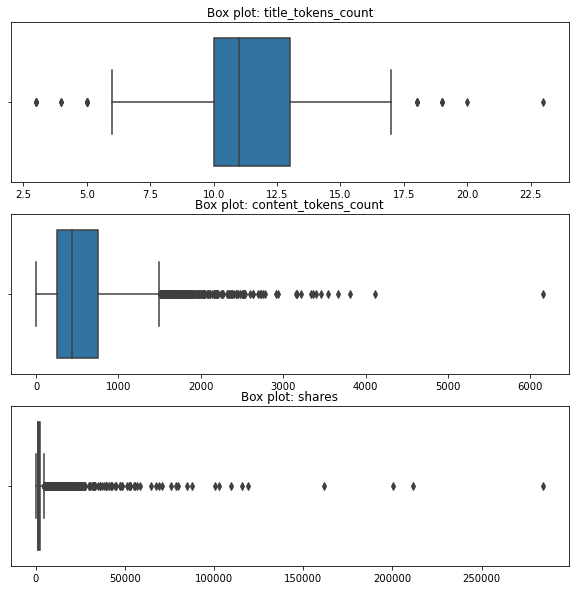

In [20]:
# plot box chart to see the outliers
fig, axes = plt.subplots(len(columns_to_check_outliers), 1,figsize=(10,10))

for i,column in enumerate(columns_to_check_outliers):
    sns.boxplot(ax=axes[i],x=df_PrePross[column])
    axes[i].set_title(f"Box plot: {column}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

**Outliers** are present in the dataset. So we use Inter Quartile Range to measure and have a threshold of 1.5 and 1.5 from Q1 & Q3 quartiles.


#####  Step3.3.1: Remove outliers using Inter Quartile Range (IQR)

**Inter Quartile Range(IQR)**:
 >- This is a way of measuring the statistical distance of the distribution of data. We have four quadriends each at 25%,50%,75%,100%. The IQR is the distance between 25 & 75 i.e., Q1 & Q3. 
 >- We generally take values beyond 1.5 times of Q1,Q3 as outliers. anything inside this range is valid dataset

In [21]:
"""
This function removes the outliers present for each feature provided.
"""
def dropOutliers(dataframe, column):
    Q3 = np.quantile(dataframe[column], 0.75)
    Q1 = np.quantile(dataframe[column], 0.25)
    IQR = Q3 - Q1
     
    min_range = Q1 - 1.5 * IQR
    max_range = Q3 + 1.5 * IQR
    
    outlier_removed = [x for x in dataframe[column] if ((x > min_range) & (x < max_range))]
    return dataframe.loc[dataframe[column].isin(outlier_removed)]

In [22]:


df_anom_removed = df_PrePross.copy() # initialize new dataframe which will hold anamoly free dataset


columns_to_check_outliers =  ['title_tokens_count', 'content_tokens_count', 'shares']

# Loop through all the features that considered to have outliers and remove anomalies using the function 'dropOutliers'

for i,column in enumerate(columns_to_check_outliers):
    df_anom_removed = dropOutliers(df_anom_removed, column)




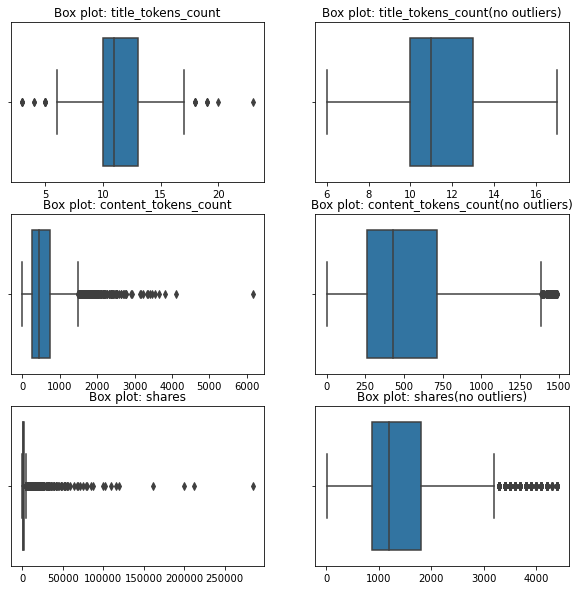

In [23]:
"""
To see the difference between with and without outliers between the features
"""

fig, axes = plt.subplots(len(columns_to_check_outliers), 2,figsize=(10,10))

for i,column in enumerate(columns_to_check_outliers):
    sns.boxplot(ax=axes[i,0],x=df_PrePross[column])
    sns.boxplot(ax=axes[i,1],x=df_anom_removed[column])
    axes[i,0].set_title(f"Box plot: {column}")
    axes[i,1].set_title(f"Box plot: {column}(no outliers)")
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('')
    axes[i,1].set_xlabel('')
    axes[i,1].set_ylabel('')

In [24]:
df_anom_removed = df_anom_removed.reset_index().drop(columns=['index']) # reset index from 0 to len

### Step 4: Data Visualization

In [25]:
"""
Group by timedelta so that to see which data related posts have spreas how much polarity in the timespan.
"""
df_0 = df_anom_removed[["timedelta","week","shares","title_tokens_count","content_tokens_count","avg_negative_polarity","avg_positive_polarity"]]\
                                                            .groupby(["timedelta"])\
                                                            .sum()\
                                                            .sort_values(by="timedelta", ascending=False)

df_0

,shares,title_tokens_count,content_tokens_count,avg_negative_polarity,avg_positive_polarity
timedelta,,,,,
100.0,108238,867.0,34958.0,-17.792374,22.680005
99.0,102482,769.0,29861.0,-15.315679,20.250507
98.0,99823,814.0,31921.0,-19.413609,23.944672
97.0,87543,561.0,21409.0,-12.034520,16.388420
96.0,45819,235.0,11012.0,-5.945516,6.825441
...,...,...,...,...,...
12.0,28087,172.0,6293.0,-3.581485,4.307346
11.0,43600,237.0,9299.0,-4.057225,5.351229
10.0,90217,601.0,27824.0,-15.602185,18.430501


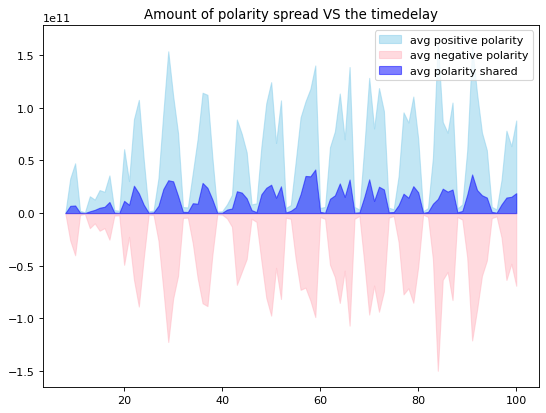

In [26]:
plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams['figure.facecolor'] = 'white'
plt.fill_between(df_0.index.get_level_values('timedelta'),np.array(df_0["avg_positive_polarity"]*df_0["shares"]*(df_0["title_tokens_count"]+df_0["content_tokens_count"])), color="skyblue",
                 alpha=0.5, label='avg positive polarity')
plt.fill_between( df_0.index.get_level_values('timedelta'),np.array(df_0["avg_negative_polarity"]*df_0["shares"]*(df_0["title_tokens_count"]+df_0["content_tokens_count"])), color="lightpink",alpha=0.5, label='avg negative polarity')
plt.fill_between(df_0.index.get_level_values('timedelta'),np.array((df_0["avg_negative_polarity"] + df_0["avg_positive_polarity"])*df_0["shares"]*(df_0["title_tokens_count"]+df_0["content_tokens_count"])), color="blue",alpha=0.5, label='avg polarity shared')
plt.legend()
plt.title("Amount of polarity spread VS the timedelay")
plt.show()

In [27]:
days = [ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

df_1 = df_anom_removed.groupby(by = "week").mean().reindex(days) # to reset the order in the custom format

In [28]:
# define the values into arrays, so that the plot can be made easily.

index = df_1.index # index of the dataframe or x-axis

# amount of positivity shared based on shares, avg_positive_polarity, token count in title and content
positivePolarity = np.array(df_1["avg_positive_polarity"]*df_1["shares"]*(df_1["title_tokens_count"]+df_1["content_tokens_count"]))
# amount of negativity shared based on shares, avg_negative_polarity, token count in title and content
negativePolarity = np.array(-1 * df_1["avg_negative_polarity"]*df_1["shares"]*(df_1["title_tokens_count"]+df_1["content_tokens_count"]))


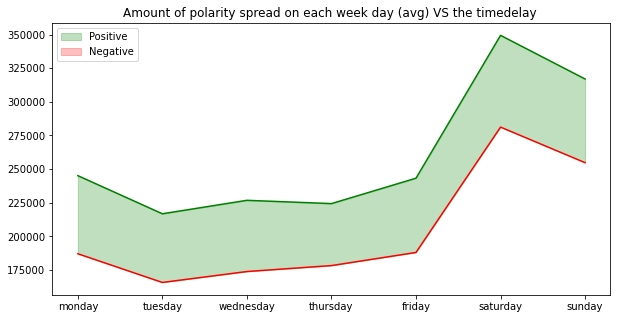

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot lines
ax.plot(index, positivePolarity, color="green")
ax.plot(index, negativePolarity, color="red")

# Fill area when income > expenses with green
ax.fill_between(
    index, positivePolarity, negativePolarity, where=(positivePolarity > negativePolarity), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)

# Fill area when income <= expenses with red
ax.fill_between(
    index, positivePolarity, negativePolarity, where=(positivePolarity <= negativePolarity), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)
ax.set_title("Amount of polarity spread on each week day (avg) VS the timedelay ")
ax.legend();

## Question 1: Is there a relation between polarity (positive/negative) of content and the week of the day concerning popularity?

In [30]:
"""Determine if the post is postive or negative polarised based on the avg values"""

df_anom_removed["overall_polarity"] = np.where((df_anom_removed['avg_positive_polarity'] >= -1 * df_anom_removed['avg_negative_polarity']),"Positive","Negative")


In [31]:
# group the values based on week and polarity 
df_1 = df_anom_removed[["week","shares","overall_polarity"]]\
                                                .groupby(["week","overall_polarity"])\
                                                .mean()\
                                                .sort_values(by="overall_polarity", ascending=False)\
                                                .reset_index()

In [32]:
df_1_final_positive = df_1[df_1['overall_polarity']=='Positive'].sort_values('week') # values of postive polarised content
df_1_final_negative = df_1[df_1['overall_polarity']=='Negative'].sort_values('week') # values of negative polarised content

<BarContainer object of 7 artists>

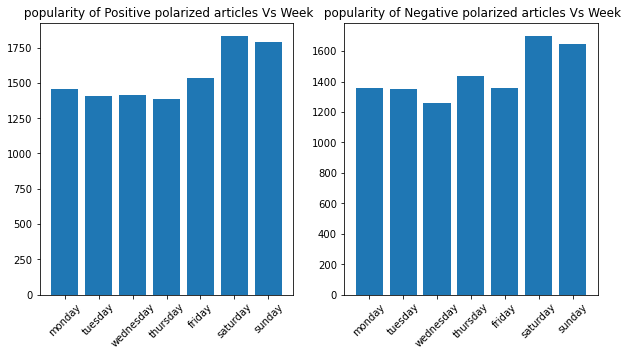

In [33]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].set_title(" popularity of Positive polarized articles Vs Week")
axes[0].tick_params(axis='x', labelrotation = 45)
axes[1].set_title(" popularity of Negative polarized articles Vs Week")
axes[1].tick_params(axis='x', labelrotation = 45)
axes[0].bar(df_1_final_positive["week"], df_1_final_positive["shares"])
axes[1].bar(df_1_final_negative["week"], df_1_final_negative["shares"])

**Answer 1** : **Saturday**

Saturday is the best day to post both the positive and negative polarised contents. 

## Question 2: Do the title features determine the popularity of the article more than the content?

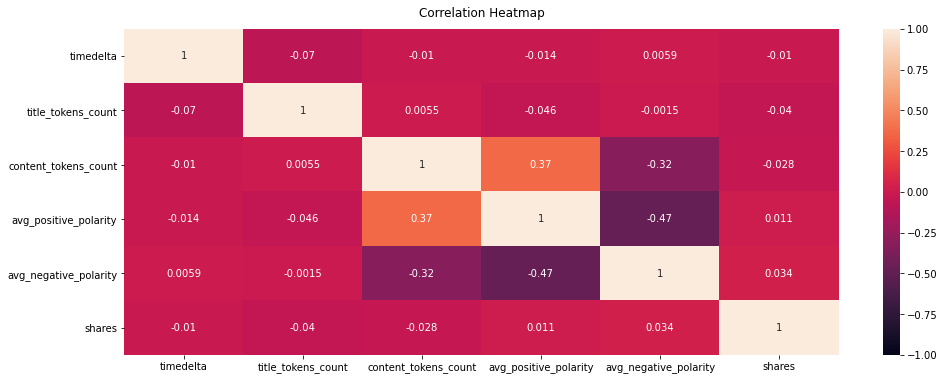

In [34]:
"""Generate heatmap of the correlation between features"""

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df_anom_removed.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Answer 2** : **Title token count**

The title token count is 42% more significant on popularity than content token count. 

_Additional points_
> - Both title and content token counts are negatively correlates. Which imples the lesser the values, more the popularity
> - negative polarised content is 3 times more correlated to the popularity of the content. 

## Question 3: Which week of the day is best based on the topic of the article?

In [35]:
df_3 = df_anom_removed[["data_channel","week","shares"]].groupby(["data_channel","week"]).mean().reset_index()

In [36]:
df_3_pivot = df_3.pivot(index='week', columns='data_channel')["shares"].reset_index()

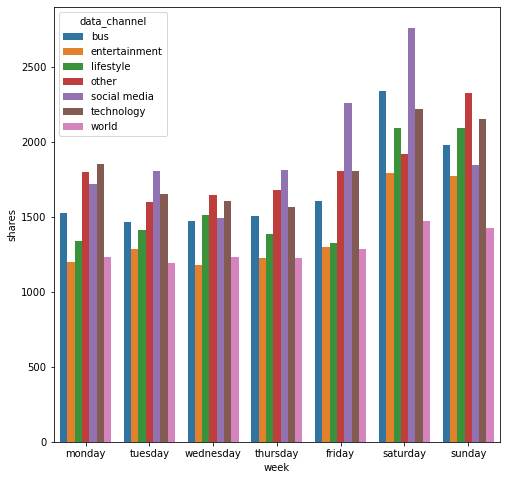

In [37]:
# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
sns.barplot(x="week", y="shares", hue="data_channel", data=df_3, ci=None);

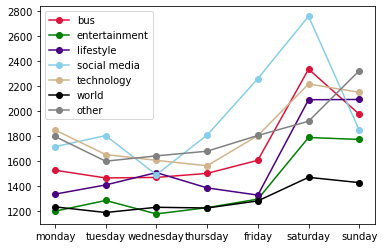

In [38]:
"""As the above graph is hard to derive conclusions, a line plot is made""" 
# multiple line plots
plt.plot( 'week', 'bus', data=df_3_pivot, marker='o',color='crimson')
plt.plot( 'week', 'entertainment', data=df_3_pivot, marker='o', color='green')
plt.plot( 'week', 'lifestyle', data=df_3_pivot, marker='o', color='indigo')
plt.plot( 'week', 'social media', data=df_3_pivot, marker='o', color='skyblue')
plt.plot( 'week', 'technology', data=df_3_pivot, marker='o', color='tan')
plt.plot( 'week', 'world', data=df_3_pivot, marker='o', color='black')
plt.plot( 'week', 'other', data=df_3_pivot, marker='o', color='gray')


# show legend
plt.legend()

# show graph
plt.show()

**Answer 3** : **Saturday**

Saturday is the best time to post an article for any given channel.  <br/>
Note : For 'other' category, which can be anomily or irrelavent content or sum of more than one category. Hence we ignore them for deriving conclusions.

### Step 5: Conclusion


> - Saturday is the best day to make any polarity (postive/negative) topic, so that it get most shares. 
> - Title length is more predominent than the content length. And is inversely related.
> - negative polarised content is 3 times more correlated to the popularity of the content. 
